# Using Relu

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_excel(r'D:\copy of htdocs\practice\Python\200days\Day184 Dee[ Learning Day 14\dataset.xlsx')

In [22]:
df.head()

,X,Y,class
0,0.3160,0.9870,0
1,2.1200,-0.0462,1
2,0.8800,-0.0758,0
3,-0.0551,-0.0373,1
4,0.8300,-0.5390,1


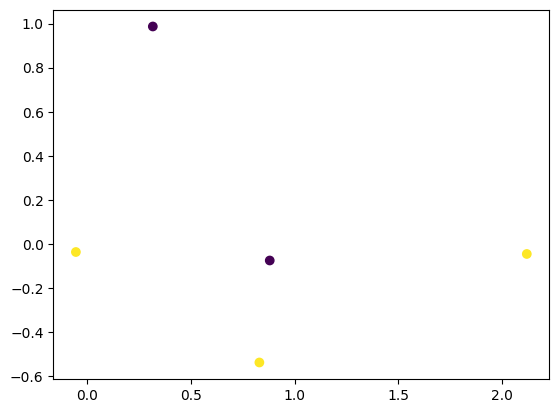

In [23]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [24]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(1,activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Set parameters to 0
model.get_weights()

[array([[ 0.45135313, -0.5159843 ,  0.03189182,  0.44949752,  0.6899237 ,
          0.6045653 ,  0.58279616,  0.23778123,  0.6786925 ,  0.5852141 ],
        [-0.12602395,  0.17431939, -0.3394106 , -0.21225995, -0.6291122 ,
          0.49692124, -0.1304583 , -0.5203944 , -0.49278045, -0.39081877]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.01028454],
        [ 0.41873533],
        [-0.42121708],
        [ 0.3380192 ],
        [-0.57014155],
        [-0.25936756],
        [ 0.10185939],
        [-0.6445267 ],
        [ 0.07036942],
        [-0.3824297 ]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
initial_weights = model.get_weights()

In [29]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [30]:
model.set_weights(initial_weights)

In [31]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


1/1 [==============================] - 1s 547ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 15.4249 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 15.4249 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 15.4249 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 15.4249 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 15.4249 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 36ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 15.4249 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 15.4249 - val_accuracy: 0.0000e

In [34]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

9600/9600 [==============================] - 7s 762us/step


<Axes: >

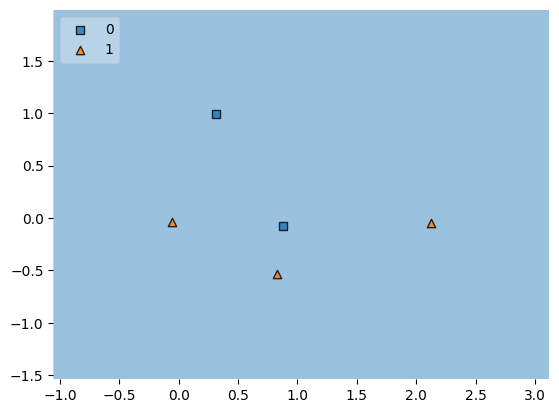

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)